# 1. Import packages

In [1]:
import os,sys
import pyclustermap
from pyclustermap import *
%matplotlib inline
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi']=300

# 2. A quick example

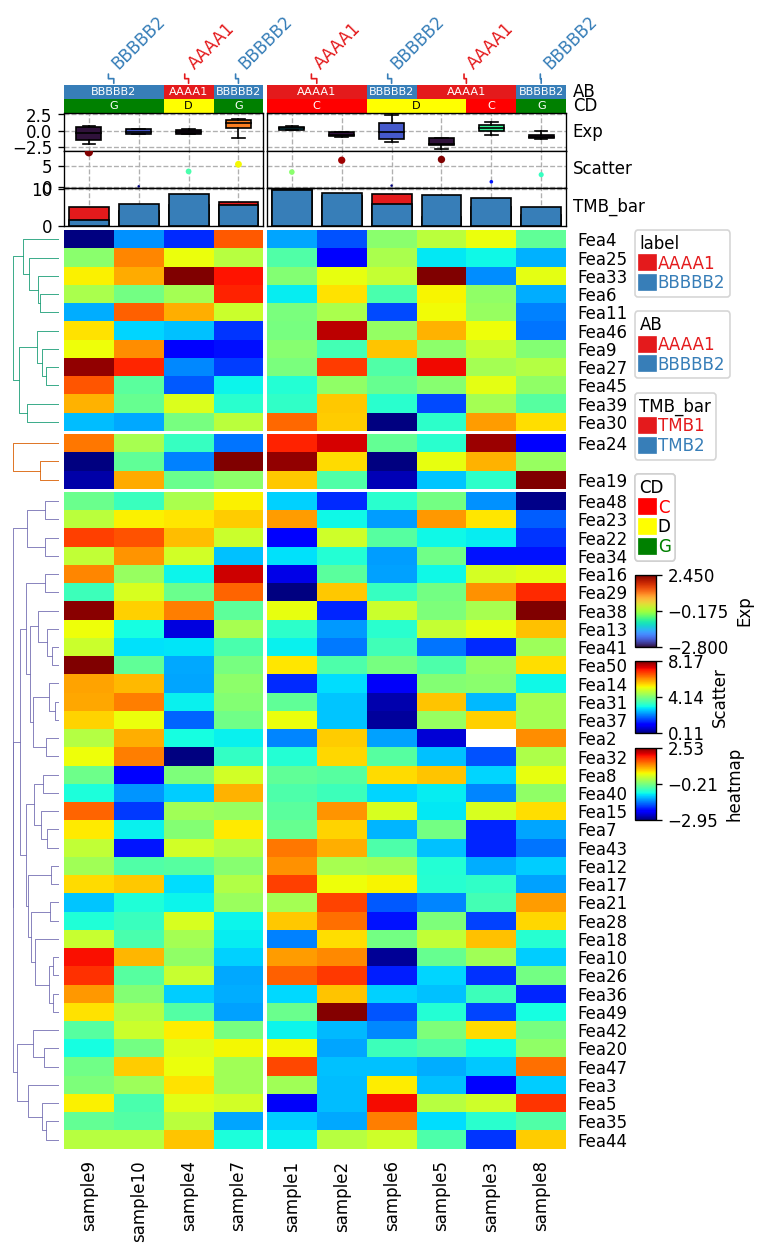

In [2]:
#Generate example dataset
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(50, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(6, 12))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'yellow', 'G': 'green'},add_text=True),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar),
                           )
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=row_ha, col_split=2, row_split=3, col_split_gap=0.5,
                     row_split_gap=1,col_dendrogram=False,plot=True,
                     tree_kws={'col_cmap': 'Set1', 'row_cmap': 'Dark2'})
plt.savefig("example1_heatmap.pdf", bbox_inches='tight')
plt.show()

# 3. Plotting annotations

In [3]:
## 3.1 Only plot the row/column annotation

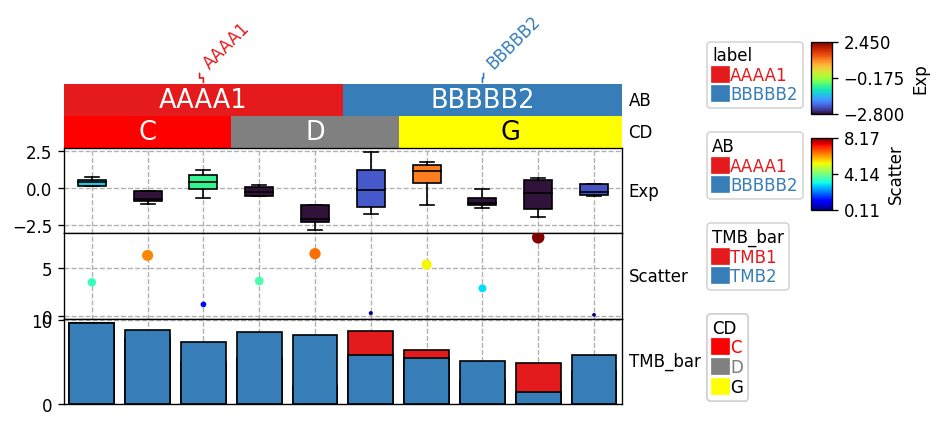

In [4]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                                           add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=5
                            )
plt.savefig("col_annotation.pdf", bbox_inches='tight')
plt.show()

### anno_label:
anno_label is used to add a text label to the annotatin, parameter `merge` control whether to merge the adjacent labels with the same text, if `merge` != True, then, texts would be draw for each columns.
### anno_simple:
anno_simple is to draw simple annotatin, cmap for anno_simple can be either categorical (Set1, Dark2, tab10 et.al) or continnuous (jet, turbo, parula).
Parameter add_text control whether to add text on the annotation, if the color and fontsize in text_kws was not specified, the color and fontsize would be determined automatically, for example, if the background color is deep, then the text color would be white, otherwise the text color would be black. The text color can be changed with parameter text_kws={'color':your_color},for example:

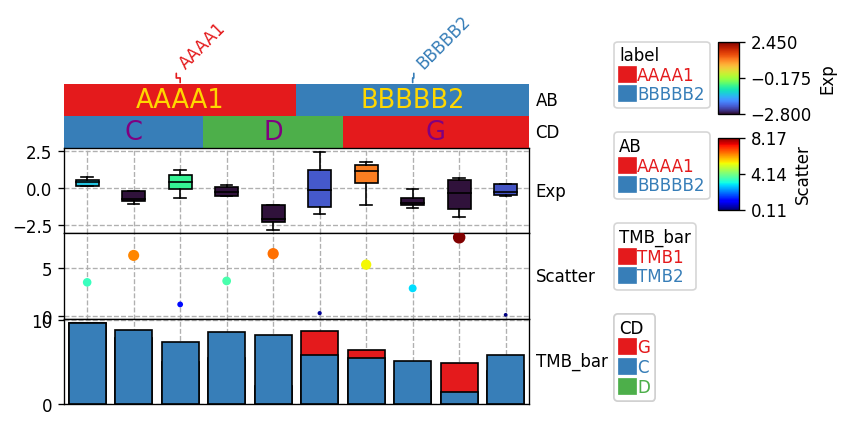

In [5]:
plt.figure(figsize=(5, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True),
                            AB=anno_simple(df.AB,add_text=True,legend=True,text_kws={'color':'gold'}), axis=1,
                            CD=anno_simple(df.CD,add_text=True,legend=True,text_kws={'color':'purple'}),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,legend_gap=5)
plt.show()

### To add a annotation quickly, you just need a dataframe
if df was given, all columns in dataframe df would be treated as a separately anno_simple annotation.

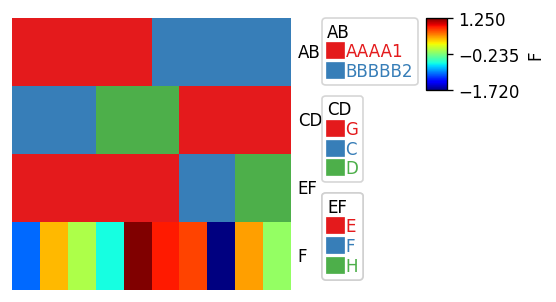

In [6]:
plt.figure(figsize=(3, 3))
row_ha = HeatmapAnnotation(df=df,plot=True,legend=True)
plt.show()

## 3.2 Plot the figure and legend separately
Sometimes, one only want to plot the figure without legend, or plot the legend in a separated pdf, you can do that by giving the parameter plot_legend=False, and plot the legend in another pdf with row_ha.plot_legends

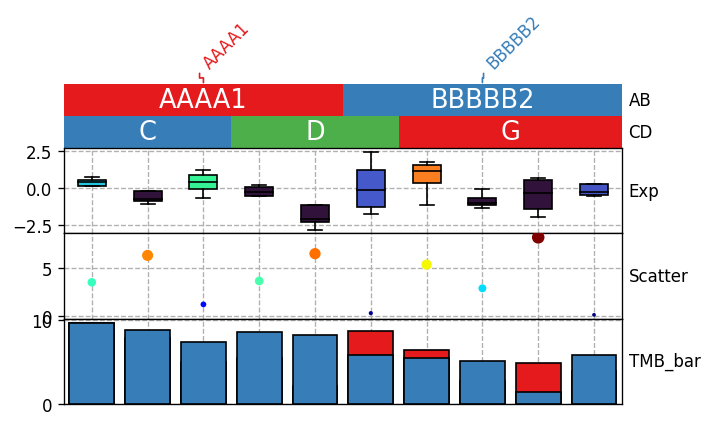

No ax was provided, using plt.gca()


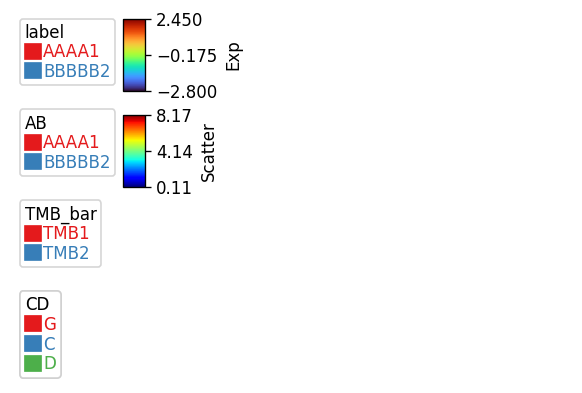

In [7]:
plt.figure(figsize=(6, 4))
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True),
                            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
                            CD=anno_simple(df.CD,add_text=True,legend=True),
                            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar,legend=True),
                           plot=True,legend=True,plot_legend=False,
                           legend_gap=5
                            )
plt.savefig("col_annotation.pdf", bbox_inches='tight')
plt.show()

plt.figure()
row_ha.plot_legends()
plt.savefig("legend.pdf",bbox_inches='tight')
plt.show()

# 4. Plotting clustermap and annotation
Here we provided a example dataset in pyclustermap, let's visualaize it.

In [35]:
!wget https://github.com/DingWB/pyclustermap/raw/main/data/influence_of_snp_on_beta.pickle

--2022-05-05 16:18:32--  https://github.com/DingWB/pyclustermap/raw/main/data/influence_of_snp_on_beta.pickle
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DingWB/pyclustermap/main/data/influence_of_snp_on_beta.pickle [following]
--2022-05-05 16:18:32--  https://raw.githubusercontent.com/DingWB/pyclustermap/main/data/influence_of_snp_on_beta.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17689596 (17M) [application/octet-stream]
Saving to: ‘influence_of_snp_on_beta.pickle’

influence_of_snp_on 100%[===================>]  16.87M  15.3MB/s    in 1.1s    

2022-05-05 16:18:34 (15.3 MB/s) 

In [36]:
import pickle
import urllib
f=open("influence_of_snp_on_beta.pickle",'rb')
data=pickle.load(f)
f.close()
beta,snp,df_row,df_col,col_colors_dict,row_colors_dict=data

In [43]:
# beta is DNA methylation beta values matrix, df_row and df_col are row and columns annotation respectively, col_colors_dict and row_colors_dict are color for annotation
print(beta.iloc[:,list(range(5))].head(5))
print(df_row.head(5))
print(df_col.head(5))

                 204875570030_R01C02  204875570030_R04C01  \
cg30848532_TC21  0.525089             0.419515              
cg30147375_BC21  0.803776             0.585928              
cg46239718_BC21  0.443958             0.517514              
cg36100119_BC21  0.351977             0.528846              
cg42738582_BC21  0.783958             0.724901              

                 204875570030_R05C01  204875570030_R06C01  204875570035_R05C02  
cg30848532_TC21  0.483276             0.460750             0.390317             
cg30147375_BC21  0.510269             0.831463             0.550146             
cg46239718_BC21  0.535909             0.450167             0.564107             
cg36100119_BC21  0.524896             0.374422             0.551200             
cg42738582_BC21  0.802178             0.848621             0.850481             
                   chr  Target  CpG  ExtensionBase ProbeDesign CON  mapFlag  \
cg30848532_TC21  chr12  1       1    0              II          C   

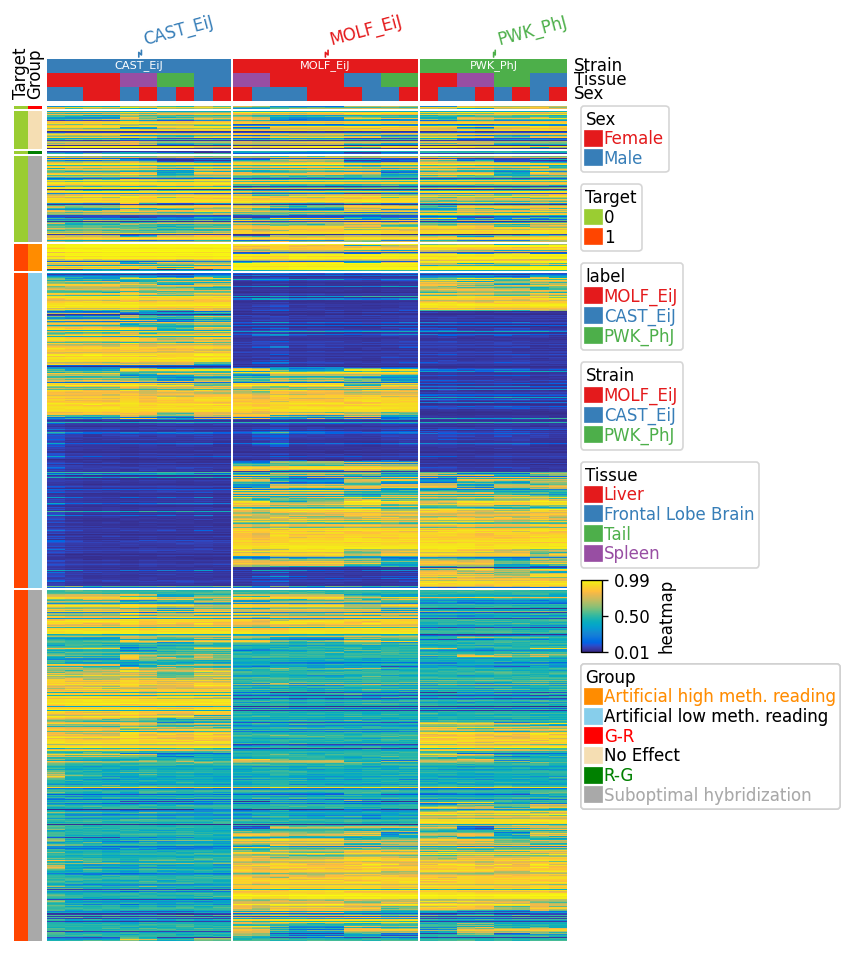

In [44]:
row_ha = HeatmapAnnotation(Target=anno_simple(df_row.Target,colors=row_colors_dict['Target'],rasterized=True),
                               Group=anno_simple(df_row.Group,colors=row_colors_dict['Group'],rasterized=True),
                               axis=0)
col_ha= HeatmapAnnotation(label=anno_label(df_col.Strain,merge=True,rotation=15),
                          Strain=anno_simple(df_col.Strain,add_text=True),
                          Tissue=df_col.Tissue,Sex=df_col.Sex,axis=1) #df=df_col.loc[:,['Strain','Tissue','Sex']]
plt.figure(figsize=(6, 10))
cm = ClusterMapPlotter(data=beta, top_annotation=col_ha, left_annotation=row_ha,
                     show_rownames=False,show_colnames=False,
                     row_dendrogram=False,col_dendrogram=False,
                     row_split=df_row.loc[:, ['Target', 'Group']],
                     col_split=df_col['Strain'],cmap='parula',
                     rasterized=True,row_split_gap=1,legend=True,
                     tree_kws={'col_cmap':'Set1'})
plt.savefig("clustermap.pdf", bbox_inches='tight')
plt.show()

## Key features:
Users can split the columns and rows into multiple subgroups by giving row_split and col_split,
row_split and col_split can be number of pandas dataframe or Series.